## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

### 2. Load the dataset and display a sample of five rows of the data frame.

In [6]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [8]:
df.shape

(319795, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

- Dataset having 4 numerical and 14 non-numerical data types

### 4. Check the statistical summary of the dataset and write your inferences.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [13]:
df.describe(include = 'O')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


- HeartDisease, Smoking, Alcohol Drinking, Stroke, DiffWalking, Sex, PhysicalActivity, Asthma, KidneyDisease, and SkinCancer columns contain the binary categories 'Yes' or 'NO'.
- Most of the person with no heart disease.
- The minimum BMI is around 12 and maximum is around 95.

### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [16]:
df.isnull().sum()/len(df)*100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

- There is no missing values in the dataset.

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [19]:
df.duplicated().sum()

18078

- There is around 18k duplicate records in the dataset.

In [21]:
df.drop_duplicates(inplace = True)

In [22]:
df.duplicated().sum()

0

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

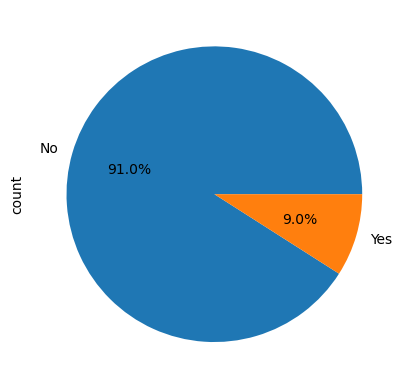

In [24]:
df['HeartDisease'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

- Observation of target column says that there is highly imbalanced.

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [27]:
df_cat = df.select_dtypes(include='O')
df_cat.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

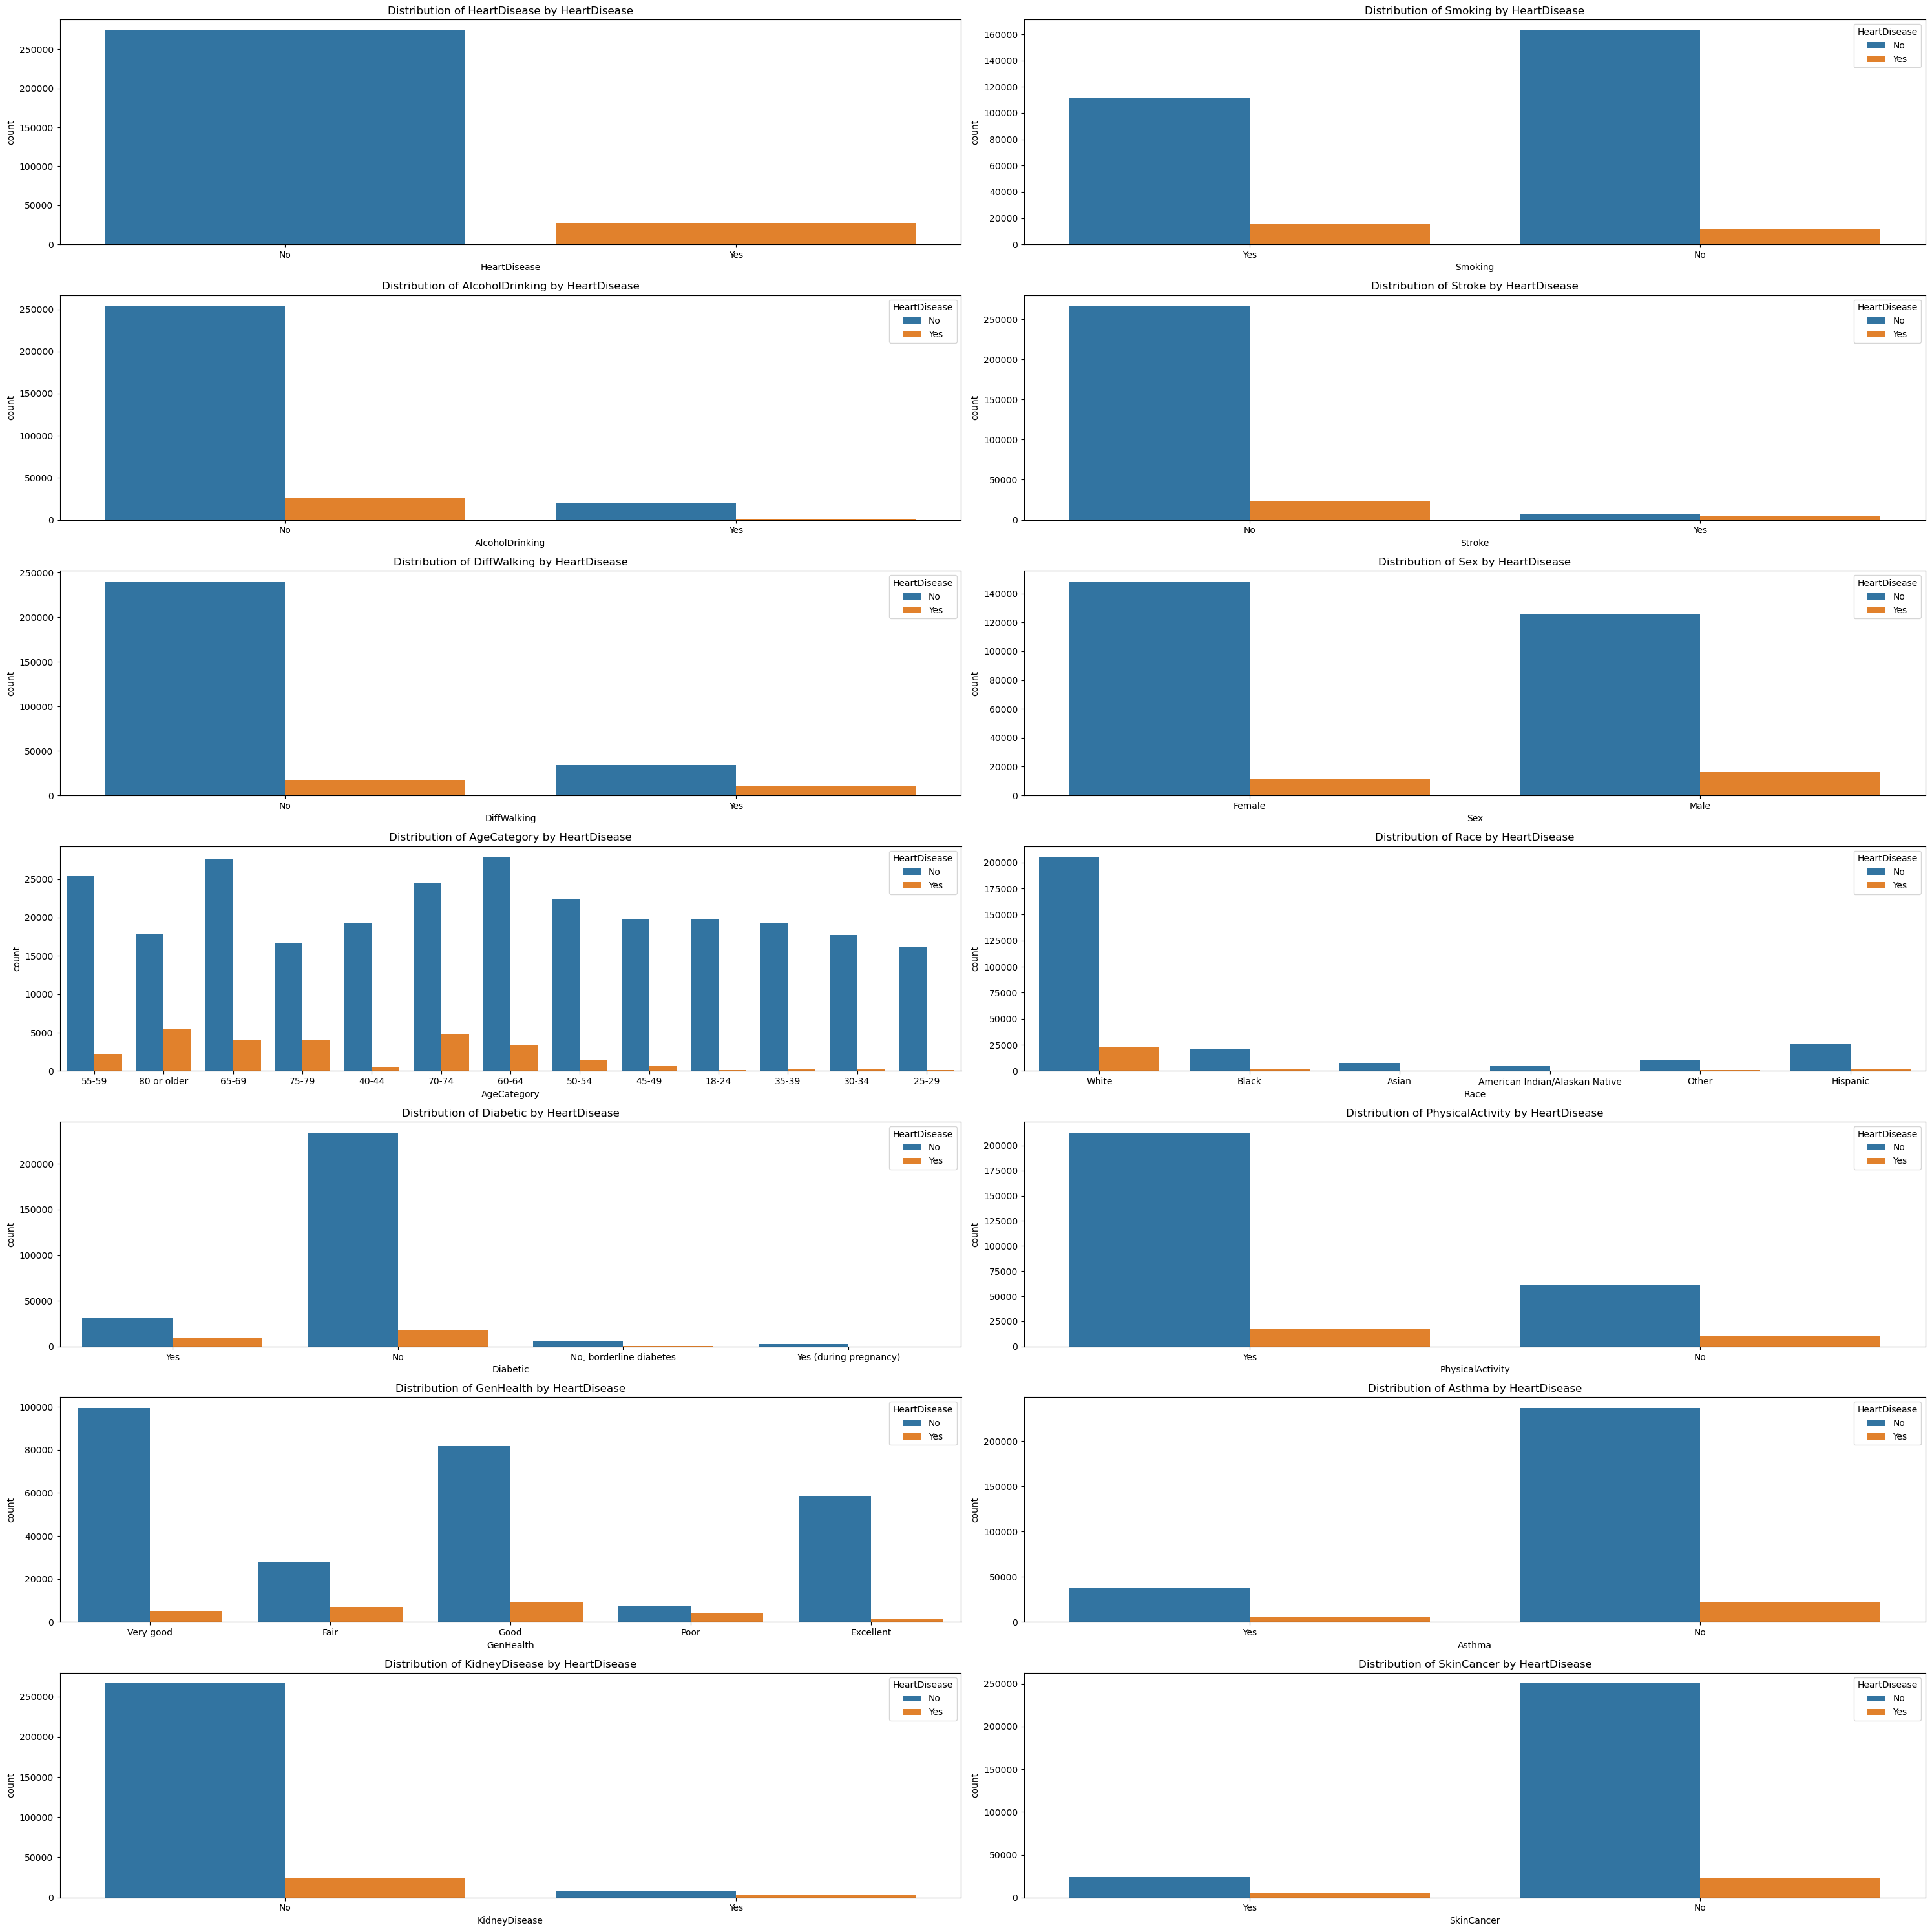

In [28]:
plt.figure(figsize=(30, 30))
i = 1

for feature in df_cat.columns:
    plt.subplot(7, 2, i)
    sns.countplot(x = feature, hue ='HeartDisease', data =df)
    plt.title(f'Distribution of {feature} by HeartDisease')
    i += 1
plt.tight_layout()
plt.show()

- People who smoke have higher chances of heart diesease than non smokers.- Males are more prone to suffer from heart disease as compared to females.- People with age limit in between 55-75 has higher chances of getting heart diseases.- There are higher chances of a person having heart disease if he does not have kidney disease , Asthama.




### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [31]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [32]:
df['Diabetic'] = df['Diabetic'].replace({'No, borderline diabetes': 'No', 'Yes (during pregnancy)':'Yes'})

In [33]:
df['Diabetic'].unique()

array(['Yes', 'No'], dtype=object)

In [34]:
df['Diabetic'].value_counts()

Diabetic
No     258572
Yes     43145
Name: count, dtype: int64

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [36]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
df['HeartDisease'] = df['HeartDisease'].replace({'Yes': 1, 'No': 0})

In [38]:
df['HeartDisease'].unique()

array([0, 1], dtype=int64)

In [39]:
df['HeartDisease'].value_counts()

HeartDisease
0    274456
1     27261
Name: count, dtype: int64

In [40]:
df['HeartDisease'].dtype

dtype('int64')

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [42]:
label_encoder = LabelEncoder()

In [43]:
object_type_variable = [i for i in df[['AgeCategory', 'Race', 'GenHealth']] if df.dtypes[i] == object]

def encoder(df):
    for i in object_type_variable:
        q = label_encoder.fit_transform(df[i].astype(str))
        df[i] = q
        df[i] = df[i].astype(int)
encoder(df)

In [44]:
df = pd.get_dummies(df, drop_first = True)

In [45]:
df.head(2)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,5,4,5.0,True,False,False,False,False,True,True,True,False,True
1,0,20.34,0.0,0.0,12,5,4,7.0,False,False,True,False,False,False,True,False,False,False


In [46]:
df = df.replace({True: 1, False: 0})

In [47]:
df.head(2)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,5,4,5.0,1,0,0,0,0,1,1,1,0,1
1,0,20.34,0.0,0.0,12,5,4,7.0,0,0,1,0,0,0,1,0,0,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDisease          301717 non-null  int64  
 1   BMI                   301717 non-null  float64
 2   PhysicalHealth        301717 non-null  float64
 3   MentalHealth          301717 non-null  float64
 4   AgeCategory           301717 non-null  int32  
 5   Race                  301717 non-null  int32  
 6   GenHealth             301717 non-null  int32  
 7   SleepTime             301717 non-null  float64
 8   Smoking_Yes           301717 non-null  int64  
 9   AlcoholDrinking_Yes   301717 non-null  int64  
 10  Stroke_Yes            301717 non-null  int64  
 11  DiffWalking_Yes       301717 non-null  int64  
 12  Sex_Male              301717 non-null  int64  
 13  Diabetic_Yes          301717 non-null  int64  
 14  PhysicalActivity_Yes  301717 non-null  int64  
 15  Asthm

- Now all my columns are numerical in type

### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [51]:
X = df.drop('HeartDisease',axis = 1)
Y = df['HeartDisease']

In [52]:
X.head(2)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,7,5,4,5.0,1,0,0,0,0,1,1,1,0,1
1,20.34,0.0,0.0,12,5,4,7.0,0,0,1,0,0,0,1,0,0,0


### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [55]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(211201, 17) (90516, 17)
(211201,) (90516,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [57]:
ss = StandardScaler()

In [58]:
X_train.iloc[:, :7] = ss.fit_transform(X_train.iloc[:, :7])
X_test.iloc[:, :7] = ss.transform(X_test.iloc[:, :7])

In [59]:
X_train.head(2)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
188627,-0.516354,-0.439337,-0.507179,1.251880,0.512361,-1.469684,-0.057969,0,0,0,0,1,0,1,0,0,1
301971,2.203127,-0.439337,0.724062,0.694199,0.512361,-0.146465,0.623187,0,0,0,1,0,0,1,0,0,0


In [60]:
X_test.head(2)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
249747,0.081963,-0.439337,-0.507179,-0.142323,-1.920700,-0.146465,-0.739125,0,0,0,0,0,0,1,1,0,0
196201,2.503059,-0.193735,1.955304,0.136518,0.512361,-0.146465,0.623187,0,0,0,0,0,0,1,0,0,0


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [62]:
def modelfunction(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    Y_predict = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_predict)
    return accuracy

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [64]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf', rf),('knn', knn), ('gb', gb), ('adb', adb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

In [65]:
result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr, nb, knn, dt, rf, adb, gb, sc], 
                             ['Logistic Regression','Naive Bayes','KNN','Decision tree', 
                              'Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']):
    
    result.loc[model_name] = modelfunction(model, X_train, Y_train, X_test, Y_test)

In [74]:
result

,Accuracy
Logistic Regression,0.909839
Naive Bayes,0.840017
KNN,0.900802
Decision tree,0.853937
Random Forest,0.898825
Ada Boost,0.910833
Gradient Boost,0.911209
Stacking,0.906337


### Conclusion

- From EDA:-
  - People who smoke have higher chances of heart diesease than non smokers.
  - Males are more prone to suffer from heart disease as compared to females.
  - People with age limit in between 55-75 has higher chances of getting heart diseases.
  - There are higher chances of a person having heart disease if he does not have kidney disease , Asthama.
- From Model:-
  - We see that the best performing models are Gradient Boost, Adaboost,Logistic Regression and KNN with around 91% accuracy.
  - The target class is highly imbalanced So, accuracy does not holds good for imbalanced data. Accuracy becomes poor measure of evaluation for our classification model in this context.
  - We can further go with evaluating the models based on the different performance metrics such as presicion, recall and F1score and choose the model accordingly.
  - Further we can apply sampling techniques and try to balance the data and build models based on that data will increase our model performance.
  - Also, we can tune the hyperparameters and find the best set of hyperparameters and building the models based on those will increase the classification performance of the model.

----
## Happy Learning:)
----